In [2]:
trim_dir='/home/subhajit/Desktop/EPTA_comparison/trim/epta-gwb-search-chains_new_sys_v1.3_trim/chains_ep_chen/hd_pl/'
full_dir='/home/subhajit/Desktop/EPTA_comparison/full/epta-gwb-search-chains_v1.3/chains_ep_chen/hd_pl/'

In [3]:
term='hd'

In [4]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/home/subhajit/Desktop/EPTA_comparison/notebooks')
from diff_chain import  Diff_chain_shift

2023-04-01 23:06:50.670732: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 23:06:50.696661: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 23:06:50.697247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 23:06:51.176974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
par_trim=pd.read_csv(trim_dir+'pars.txt', header = None)
lt=len(par_trim)
par_trim

,0
0,J0030+0451_red_noise_gamma
1,J0030+0451_red_noise_log10_A
2,J0613-0200_dm_gp_gamma
3,J0613-0200_dm_gp_log10_A
4,J0751+1807_dm_gp_gamma
...,...
62,J2124-3358_dm_gp_log10_A
63,J2322+2057_red_noise_gamma
64,J2322+2057_red_noise_log10_A
65,gw_hd_gamma


In [6]:
trim_1=np.loadtxt(trim_dir+'chain_1.txt',usecols=(lt-1,lt-2,-4))

In [7]:
par_full=pd.read_csv(full_dir+'pars.txt', header = None)
lf=len(par_full)
par_full

,0
0,J0030+0451_red_noise_gamma
1,J0030+0451_red_noise_log10_A
2,J0613-0200_dm_gp_gamma
3,J0613-0200_dm_gp_log10_A
4,J0613-0200_red_noise_gamma
...,...
69,J2124-3358_dm_gp_log10_A
70,J2322+2057_red_noise_gamma
71,J2322+2057_red_noise_log10_A
72,gw_hd_gamma


In [8]:
full_1=np.loadtxt(full_dir+'chain_1.txt',usecols=(lf-1,lf-2,-4))

In [9]:
trim=trim_1.T[0:2];full=full_1.T[0:2]

In [10]:
names_red = ['logA_R','gamma_R']
labels_red=['\log A_{R}','\gamma_{R}']
del_names=['delta_logA_R','delta_gamma_R']

In [11]:
trim_red=MCSamples(samples=np.array(trim).transpose(),loglikes=trim_1.T[-1],names=names_red,labels=labels_red,label='TRIM')
full_red=MCSamples(samples=np.array(full).transpose(),loglikes=full_1.T[-1],names = names_red,labels=labels_red,label='FULL')


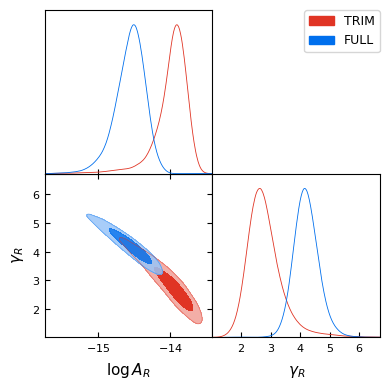

In [12]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([trim_red,full_red], filled=True)
plt.savefig('trimvsfull_'+term+'.png',dpi=300)
plt.show()

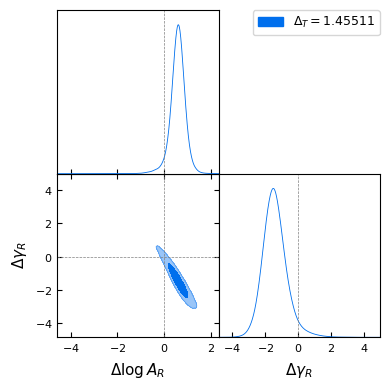

In [13]:
%matplotlib inline
diff_chain_red, nsig_red,sigl_red,sigu_red=Diff_chain_shift(trim_red,full_red)

g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_red, filled=True,legend_labels = ['$\Delta_T=$'+
                        str("{:.5f}".format(nsig_red))],markers=[0,0,0,0])

plt.savefig('diff_trimvsfull_'+term+'.png',dpi=300)

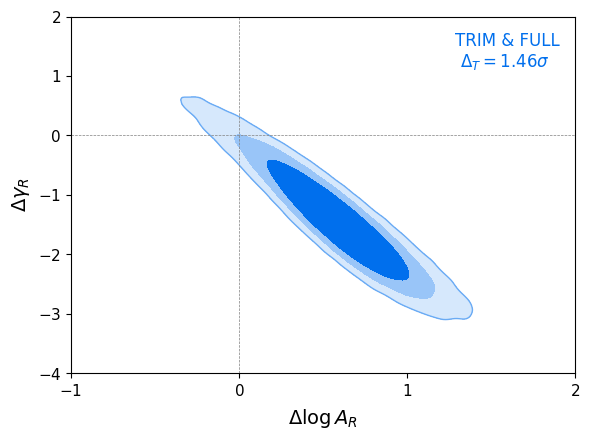

In [14]:
g = plots.get_single_plotter()
diff_chain_red.updateSettings({'contours': [utilities.from_sigma_to_confidence(nsig_red),0.68, 0.95]})
g.settings.num_plot_contours = 3
g.plot_2d(diff_chain_red,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=[-1,2,-4,2])
g.add_legend([ trim_red.getLabel()+' & '+full_red.getLabel()+ 
              '\n $\Delta_T=$'+str("{:.2f}".format(nsig_red))+'$\sigma$'], colored_text=True);
g.add_x_marker(0)
g.add_y_marker(0)
plt.savefig('diff_trimvsfull_'+term+'_v2.png',dpi=300)

In [15]:
getdist.mcsamples.MCSamples.saveAsText(diff_chain_red,root='./HD/del_trim_full',make_dirs=True)